# Running Cells in Sagemaker

### Running notebook cells 

You can run code blocks in a notebook in two ways:

1.) You can highlight the cell by clicking on it with your cursor and pressing the play button in the notebook's toolbar.  
2.) You can press **Shift+Enter** in a cell to run the cell  

In both cases, you will be advanced to the next cell, or a new cell when you do this. 

# Exploring your data lake

### Import `awswrangler` 

To begin, run the cell below. It will import the AWS SDK for `awswrangler` (https://github.com/aws/aws-sdk-pandas), a Python library that retrieves data from your data lake. It will be used for the rest of the tutorial.

The cell will also import pandas (https://github.com/pandas-dev/pandas), as you will need the concatenate function it provides in this tutorial.

In [1]:
import awswrangler as wr
import pandas as pd 

### Show database name  

The Model-Prime Analytics Platform stores channel message data from your robotics logs in this database. The name of the database includes your Model-Prime organization name. Execute the next cell to view the database name.

In [2]:
wr.catalog.databases()

Database Description
0  prime-demo-stage

### Set 'database' and 'workgroup' 

Throughout this tutorial, you will run Athena queries to create dataframes. In order to avoid pasting the database and workgroup names in every query, the next cell creates variables to store their names. The database and workgroup names are the same.

In [3]:
databases=wr.catalog.databases()
db=databases.at[0, "Database"]
wg=db

print(f"database : {db}, working group: {wg}")

database : prime-demo-stage, working group: prime-demo-stage


### List tables in the database

Execute the next cell to list the tables in the database. Note that tables will only exist if you have ingested robolog data.

In [5]:
wr.catalog.tables(database=db).head(100)

Database                                      Table Description  \
0   prime-demo-stage                           channel_mappings               
1   prime-demo-stage              flatten_back_camera_image_raw               
2   prime-demo-stage             flatten_difficult_pose_stamped               
3   prime-demo-stage             flatten_front_camera_image_raw               
4   prime-demo-stage              flatten_left_camera_image_raw               
5   prime-demo-stage             flatten_right_camera_image_raw               
6   prime-demo-stage                             flatten_rosout               
7   prime-demo-stage               flatten_terrible_temperature               
8   prime-demo-stage              metadata_db_metadata_channels               
9   prime-demo-stage             metadata_db_metadata_intervals               
10  prime-demo-stage                      metadata_db_mp_fields               
11  prime-demo-stage            metadata_db_organization_fields               
12  prime-demo-stage  metadata_db_organization_robolog_metadata               
13  prime-demo-stage                       metadata_db_robologs               
14  prime-demo-stage                  raw_back_camera_image_raw               
15  prime-demo-stage                 raw_difficult_pose_stamped               
16  prime-demo-stage                 raw_front_camera_image_raw               
17  prime-demo-stage                  raw_left_camera_image_raw               
18  prime-demo-stage                 raw_right_camera_image_raw               
19  prime-demo-stage                                 raw_rosout               
20  prime-demo-stage                   raw_terrible_temperature               

         TableType                                            Columns  \
0   EXTERNAL_TABLE  channel_type_hash, channel_name, table_name, f...   
1   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
2   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
3   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
4   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
5   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
6   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
7   EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
8   EXTERNAL_TABLE                         field_value_id, channel_id   
9   EXTERNAL_TABLE      field_value_id, start_time, lasting, end_time   
10  EXTERNAL_TABLE  field_id, field_name, is_inherent, description...   
11  EXTERNAL_TABLE  field_id, client_id, mp_field, field_alias, is...   
12  EXTERNAL_TABLE  client_id, robolog_id, field_id, field_value, ...   
13  EXTERNAL_TABLE  robolog_id, organization_id, robolog_type, ing...   
14  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
15  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
16  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
17  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
18  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
19  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   
20  EXTERNAL_TABLE  timestamp_seconds, timestamp_rfc3339, elapsed_...   

          Partitions  
0            datestr  
1   version, datestr  
2   version, datestr  
3   version, datestr  
4   version, datestr  
5   version, datestr  
6   version, datestr  
7   version, datestr  
8                     
9                     
10                    
11                    
12                    
13                    
14  version, datestr  
15  version, datestr  
16  version, datestr  
17  version, datestr  
18  version, datestr  
19  version, datestr  
20  version, datestr

### Understanding the tables 

You should see raw and flattened tables for the channels from your robologs.

You should also see tables extracted from the Model-Prime Metadata Service database, which are prefixed with `metadata_db`. All of this data is available when performing analysis in a notebook. 


The code block below will describe data available in a table table. Replace the placeholder with the name of a table prefixed by `raw` in the output above.

In [ ]:
wr.catalog.table(database=db, table="<raw_table_name>")

You should see columns containing message metadata, such as `timestamp_seconds` and `message_uuid`, as well as the actual message data in the `content` column.

To view the structure of the `content` data, execute the next cell.

In [ ]:
df_raw_data = wr.athena.read_sql_query(
    "SELECT * FROM <raw_table_name> LIMIT 1",
    database=db,
    workgroup=wg,
)

# Displays the first record in the `content` column.
row_raw_content = df_raw_data.content[0]

row_raw_content

### Shutting down the notebook 

It is best practice to shut down your notebook space when you are done. 


Navigate back to the tab with your JupyterLab space, and click on `Stop Space`.

![Description](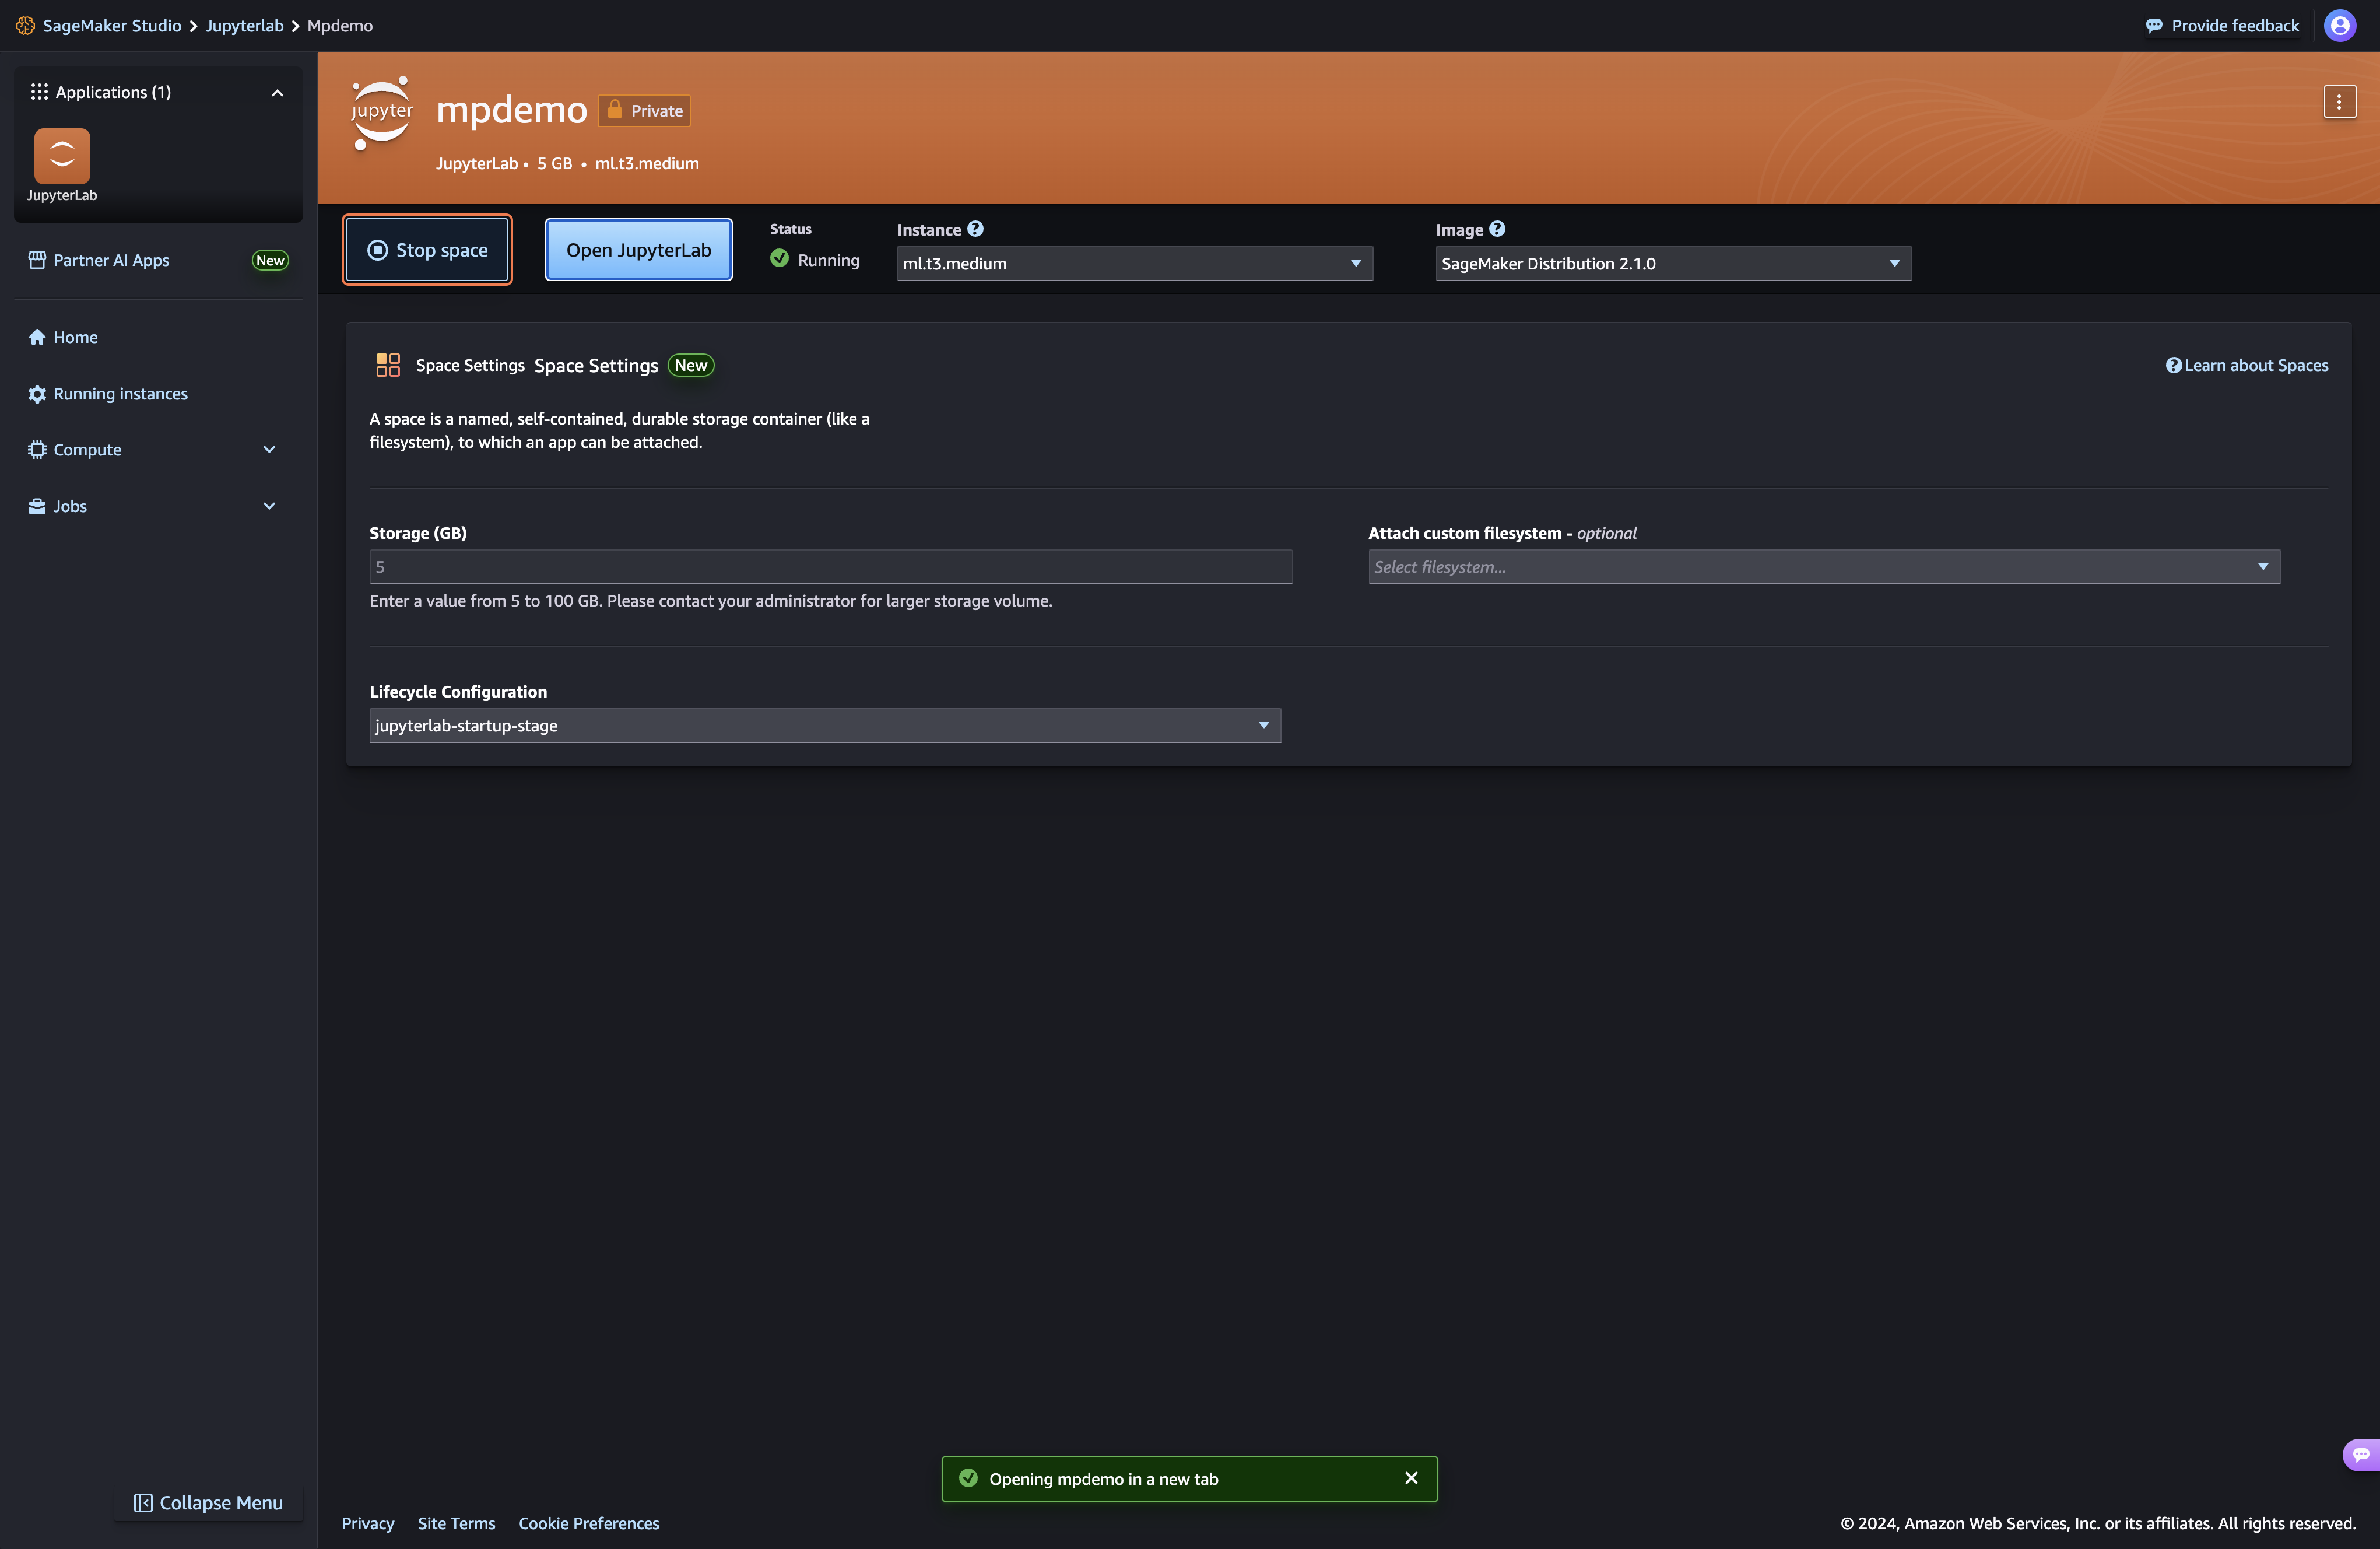
)

You will see a confirmation dialog. Click `Stop space`. 

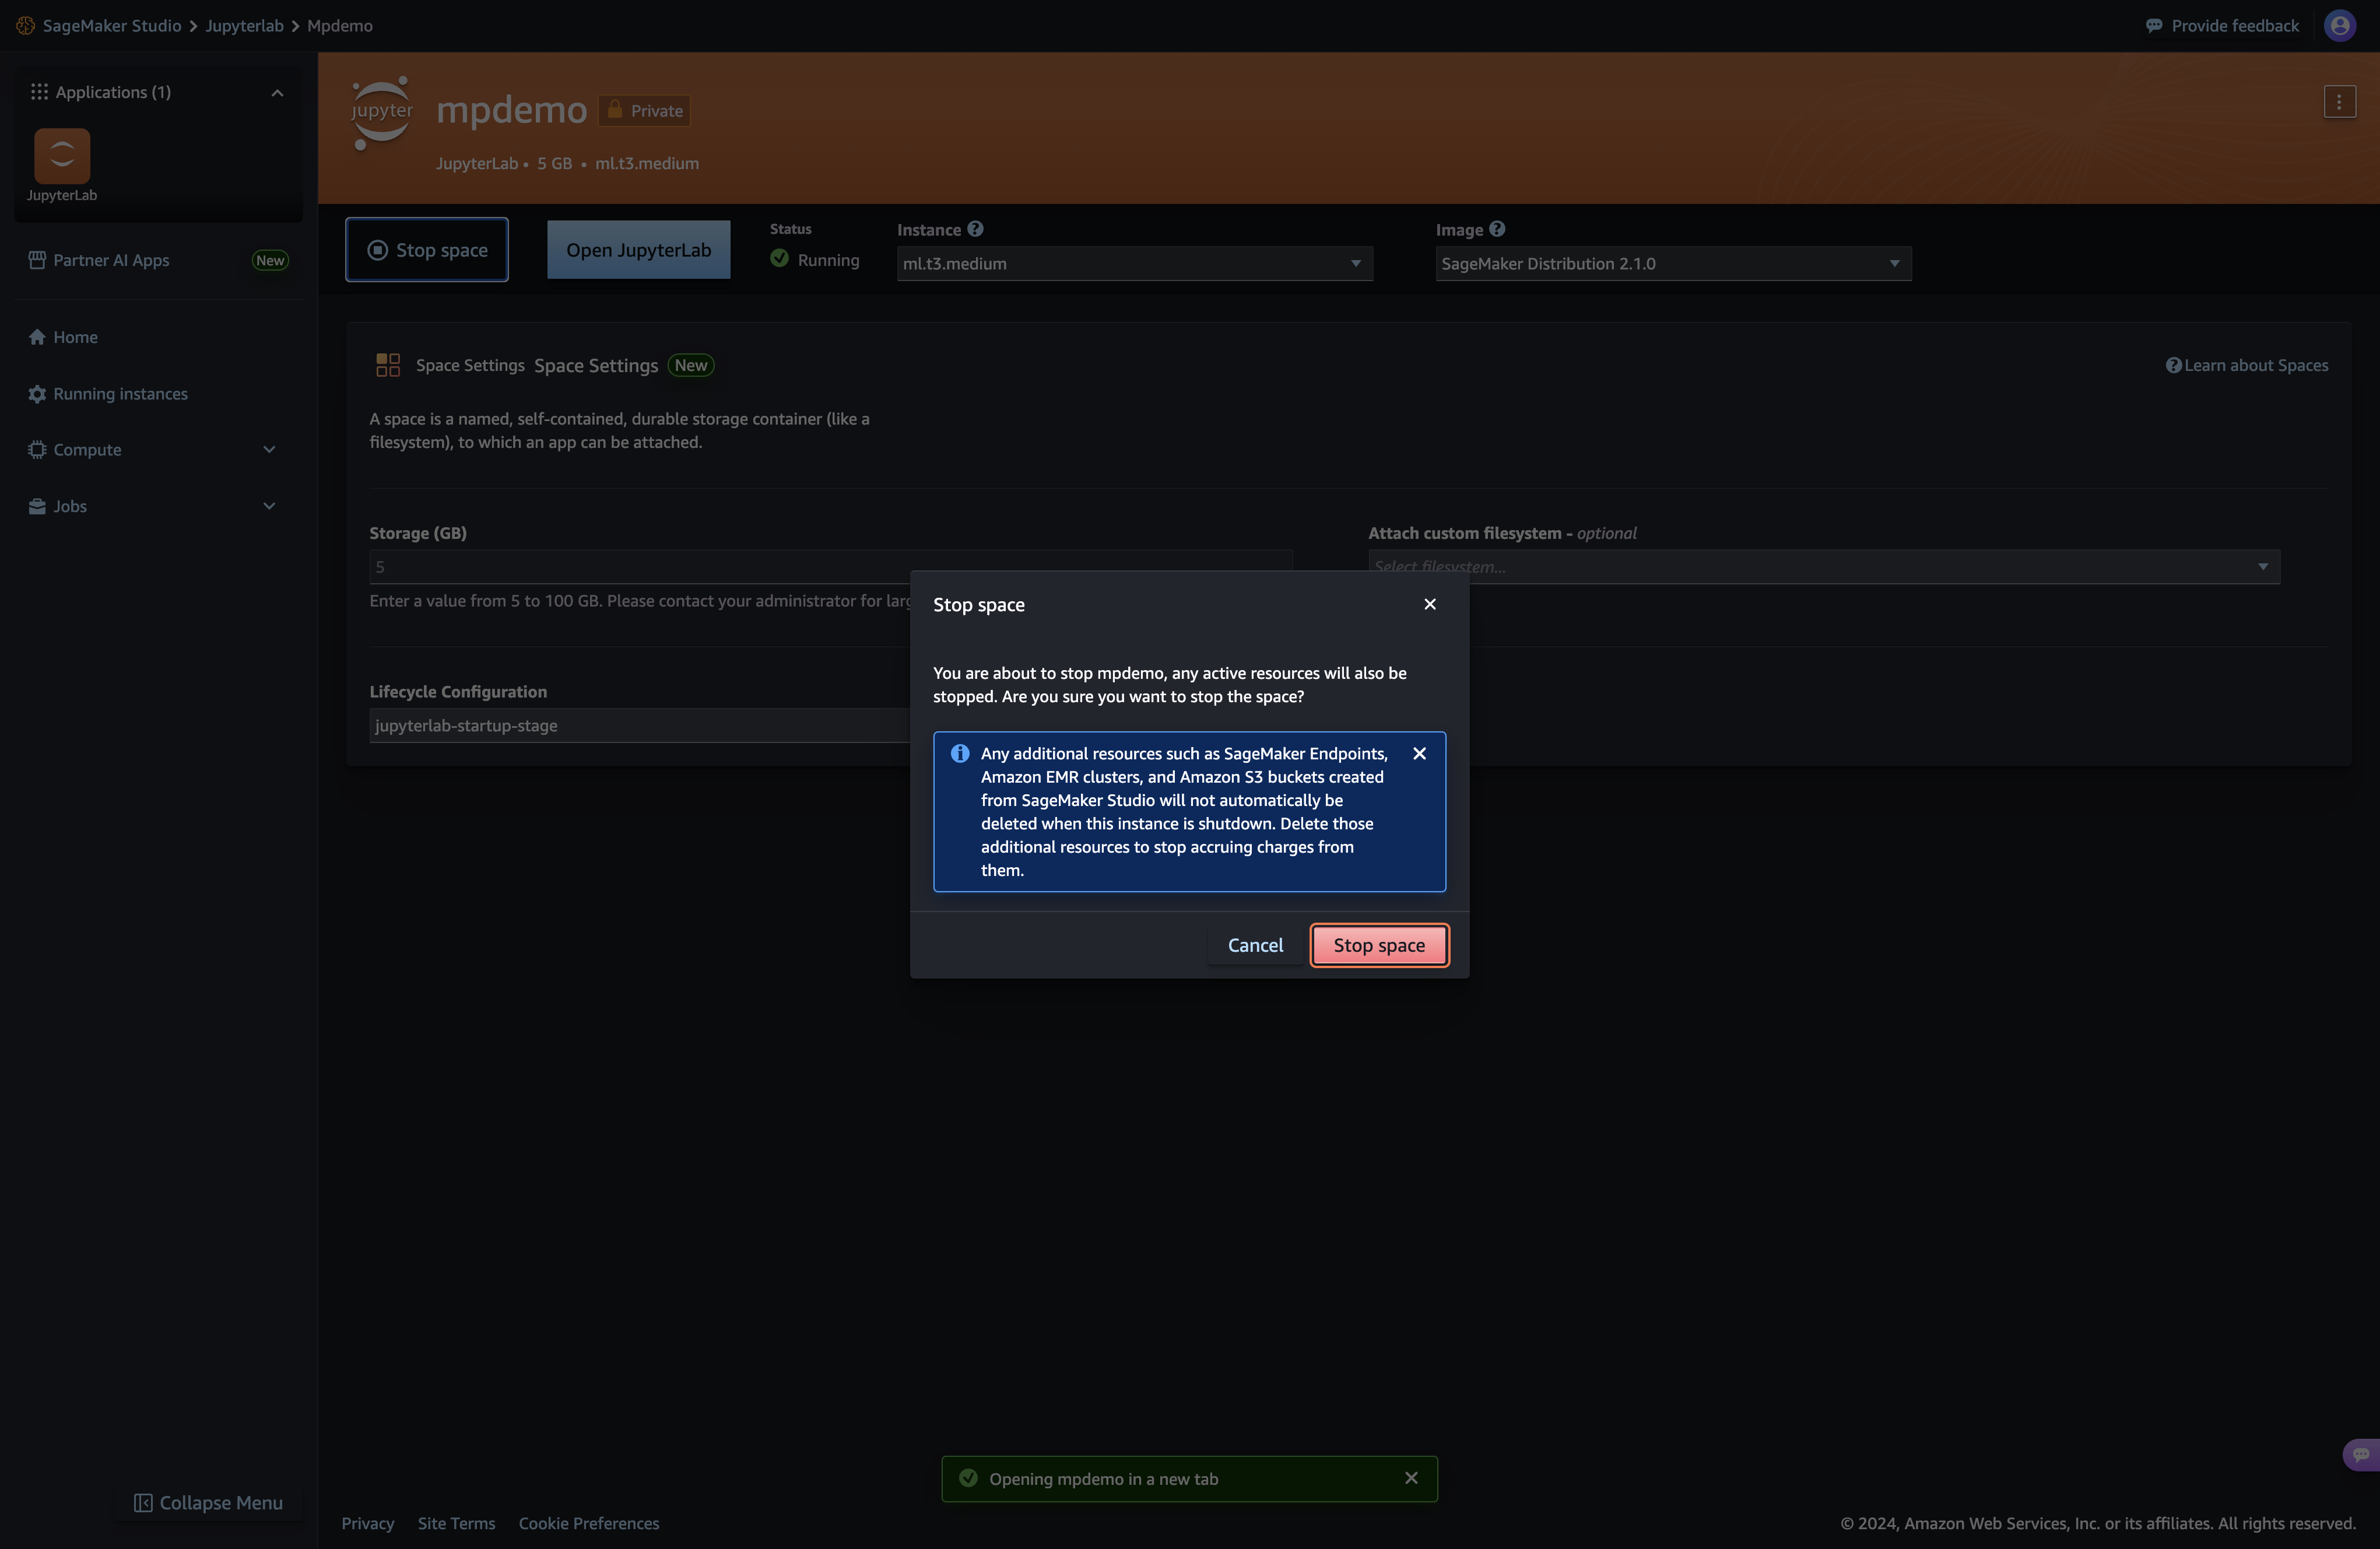